In [1]:
import pandas as pd

In [23]:
df = pd.read_csv('funda_final.csv')

In [24]:
df = df.reset_index()
df['price_sqm2'] = round(df['price_sqm2'],2)
df

,index,categorieObject,indTuin,perceelOppervlakte,aantalKamers,aantalBadkamers,selling_days,house_age,price_sqm2,Total_theft_from_house,...,energielabelKlasse_C,energielabelKlasse_D,energielabelKlasse_E,energielabelKlasse_F,energielabelKlasse_G,energielabelKlasse_no_label,buurt_classification_Extremely High,buurt_classification_High,buurt_classification_Low,buurt_classification_Moderate
0,0,1,1,148.0,5,1.0,0,40,1536.76,2.0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,70.0,3,1.0,113,19,3821.43,1.0,...,0,0,0,0,0,1,0,1,0,0
2,2,1,1,104.0,4,1.0,243,50,2389.71,1.0,...,0,0,0,0,0,1,0,0,0,1
3,3,1,1,1028.0,5,1.0,221,33,1182.07,1.0,...,1,0,0,0,0,0,0,0,0,1
4,4,0,0,105.0,3,1.0,185,1,6238.10,4.0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188257,188257,1,1,137.0,4,1.0,32,8,1736.64,0.0,...,0,0,0,0,0,0,0,0,0,1
188258,188258,1,1,160.0,4,1.0,17,25,2130.95,5.0,...,0,0,0,0,0,1,0,0,1,0
188259,188259,1,1,465.0,5,1.0,215,72,3954.55,4.0,...,0,0,0,0,0,1,0,1,0,0
188260,188260,1,1,300.0,7,1.0,98,14,2180.23,1.0,...,0,0,0,0,0,0,0,1,0,0


{
    "base_folder": "C:/Users/RiccardoPinosio/Repositories/personal/forecasting_case_study/data",
    "loading_params": {
        "reload_clean_data": true
    },
    "cleaning_params": {},
    "training_params": {
        "test_perc": 0.2,
        "hypertuning": {
            "RF_params": {
                "n_estimators": [100, 200, 300, 400],
                "max_depth": [2,4,6,8]
            },
            "xgboost_params": {
                "n_estimators": [100]
            }
        }
    }
}

In [4]:
import numpy as np
class DataPartitioner(object):
    '''Class to partition data into train and test,
    and to partition test into 5-fold cross validation splits.
    '''
    def __init__(self, perc_test = 0.2, train_cv_splits = 5, seed = 9):
        self.perc_test = perc_test
        self.train_cv_splits = train_cv_splits
        self.seed = seed

    def partition_data(self, df):
        obs = df.copy()
        obs_test = obs.sample(frac=self.perc_test, random_state = self.seed).copy()
        obs_test = obs_test.assign(test = True).assign(cv_split=np.nan)

        obs_train = (
        obs.merge(obs_test, how = 'left', indicator = True)
        .query("_merge == 'left_only'")
        .drop('_merge', axis=1)
        .assign(test=False))
        cv_splits = np.random.randint(1, self.train_cv_splits + 1, obs_train.shape[0])
        obs_train = obs_train.assign(cv_split = cv_splits)
        final_obs = pd.concat([obs_test, obs_train]).reset_index(drop=True)
        return final_obs, obs_train, obs_test

In [25]:
validation_mapping = DataPartitioner().partition_data(df)

In [26]:
validation_mapping[1]

,index,categorieObject,indTuin,perceelOppervlakte,aantalKamers,aantalBadkamers,selling_days,house_age,price_sqm2,Total_theft_from_house,...,energielabelKlasse_E,energielabelKlasse_F,energielabelKlasse_G,energielabelKlasse_no_label,buurt_classification_Extremely High,buurt_classification_High,buurt_classification_Low,buurt_classification_Moderate,test,cv_split
0,0,1,1,148.0,5,1.0,0,40,1536.76,2.0,...,0,0,0,0,0,0,0,1,False,3
2,2,1,1,104.0,4,1.0,243,50,2389.71,1.0,...,0,0,0,1,0,0,0,1,False,5
3,3,1,1,1028.0,5,1.0,221,33,1182.07,1.0,...,0,0,0,0,0,0,0,1,False,2
5,5,1,1,880.0,5,2.0,55,22,3173.08,0.0,...,0,0,0,0,1,0,0,0,False,5
7,7,1,1,450.0,6,1.0,74,9,3514.85,2.0,...,0,0,0,1,1,0,0,0,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188256,188256,0,0,80.0,3,1.0,9,9,2337.50,1.0,...,0,0,0,0,0,1,0,0,False,2
188258,188258,1,1,160.0,4,1.0,17,25,2130.95,5.0,...,0,0,0,1,0,0,1,0,False,4
188259,188259,1,1,465.0,5,1.0,215,72,3954.55,4.0,...,0,0,0,1,0,1,0,0,False,5
188260,188260,1,1,300.0,7,1.0,98,14,2180.23,1.0,...,0,0,0,0,0,1,0,0,False,4


In [57]:
from copy import deepcopy
import itertools
import statistics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
tuning_params = {"n_estimators": [100, 125, 150], "min_samples_split": [30]}
estimator = RandomForestRegressor(random_state=1234)
parameter_combos = []
parameter_combos_dicts = []
class Hypertuner(object):
    def __init__(self, estimator, tuning_params, validation_mapping):
        self.estimator = estimator
        self.tuning_params = tuning_params
        self.validation_mapping = validation_mapping


    def calculate_mean_cv_error(self, train_set, estimator_cv):
        # now perform cross validation fitting for each split
        splits = train_set['cv_split'].unique().tolist()
        splits.sort()

        cv_errors = []
        cv_abs_errors = []

        for i in splits:
            train_set =  train_set.drop([ 'index', 'test'], axis = 1)
            train_split = train_set.query(f"cv_split != {i}")
            x_train = train_split.loc[:, train_split.columns != 'price_sqm2']
            x_train = x_train.drop('cv_split', axis = 1)
            y_train = train_split['price_sqm2']
            estimator_cv.fit(x_train, y_train)
            # evaluate the model on split 1
            test_split = train_set.query(f"cv_split == {i}")
            x_test = test_split.loc[:, test_split.columns != 'price_sqm2']
            x_test = x_test.drop('cv_split', axis = 1)
            y_test = test_split['price_sqm2']
            y_pred = estimator_cv.predict(x_test)
            # calculate error measure on this fold for the estimator with the
            # given parameters
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae = mean_absolute_error(y_test, y_pred)
            
            cv_errors.append(rmse)
            cv_abs_errors.append(mae)

            mean_rmse = statistics.mean(cv_errors)
            mean_mae = statistics.mean(cv_abs_errors)
            return mean_rmse, mean_mae, y_test, y_pred
        
        
    def tune_model(self, train_set):
        '''Perform the hypertuning of the estimator on the train set
        for all the combinations of the hyperparameters
        '''
        parameter_combos = []
        parameter_combos_dicts = []
        for a in itertools.product(*self.tuning_params.values()):
            parameter_combos.append(a)

        for i in parameter_combos:
            d = {}
            for j in range(len(i)):
                d[list(self.tuning_params.keys())[j]] = i[j]
            parameter_combos_dicts.append(d)

        validation_mapping_train = self.validation_mapping.query("test == False")
        train_set = train_set.merge(validation_mapping_train)

        for d in parameter_combos_dicts:
            estimator_cv = deepcopy(self.estimator)
            estimator_cv = estimator_cv.set_params(**d)
            mean_cv_error = self.calculate_mean_cv_error(train_set, estimator_cv)
            print(d, '    RMSE: ', mean_cv_error[0], '---MAE: ', mean_cv_error[1])
        return mean_cv_error
            

In [58]:
error_results = Hypertuner(estimator, tuning_params, validation_mapping[0]).tune_model(validation_mapping[1])

{'n_estimators': 100, 'min_samples_split': 30}     RMSE:  530.1590465873292 ---MAE:  355.57559133917135
{'n_estimators': 125, 'min_samples_split': 30}     RMSE:  529.9998049536823 ---MAE:  355.46764862836545
{'n_estimators': 150, 'min_samples_split': 30}     RMSE:  529.8619706617596 ---MAE:  355.33305522865095


#### Random Forest

In [13]:
# Libraries and options
# If error [No module named 'sklearn'], in terminal: conda install -c conda-forge scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
%matplotlib notebook
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [60]:
error_rate = abs(error_results[2] - error_results[3]) / error_results[2] * 100
print("5% Model accuracy is: ", error_rate[ error_rate <5 ].count()/error_rate.count())
print("10% Model accuracy is: ", error_rate[ error_rate <10 ].count()/error_rate.count())
print("15% Model accuracy is: ", error_rate[ error_rate <15 ].count()/error_rate.count())
print("20% Model accuracy is: ", error_rate[ error_rate <20 ].count()/error_rate.count())
print("25% Model accuracy is: ", error_rate[ error_rate <25 ].count()/error_rate.count())
print("30% Model accuracy is: ", error_rate[ error_rate <30 ].count()/error_rate.count())


5% Model accuracy is:  0.28862490045128747
10% Model accuracy is:  0.5113485532253783
15% Model accuracy is:  0.6705933103265198
20% Model accuracy is:  0.7805282718343509
25% Model accuracy is:  0.8514733209450491
30% Model accuracy is:  0.8974980090257499


<IPython.core.display.Javascript object>


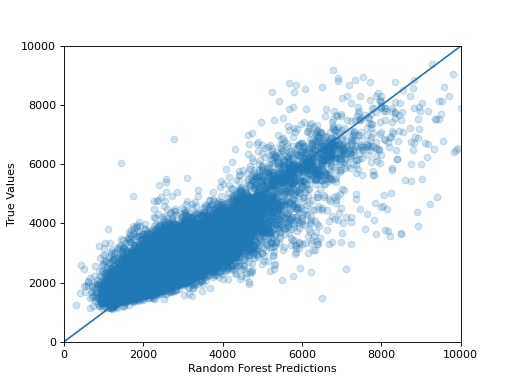

In [61]:
plt.figure()
plt.scatter(error_results[2], error_results[3], alpha=0.2)
plt.xlabel('Random Forest Predictions')
plt.ylabel('True Values')
lims = [0, 10000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

## Boosting

In [67]:
from copy import deepcopy
import itertools
import statistics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
tuning_params = {"n_estimators": [100, 125, 150], "max_depth": [8, 10, 12]}
estimator = XGBRegressor(random_state=1234)
parameter_combos = []
parameter_combos_dicts = []
class Hypertuner(object):
    def __init__(self, estimator, tuning_params, validation_mapping):
        self.estimator = estimator
        self.tuning_params = tuning_params
        self.validation_mapping = validation_mapping


    def calculate_mean_cv_error(self, train_set, estimator_cv):
        # now perform cross validation fitting for each split
        splits = train_set['cv_split'].unique().tolist()
        splits.sort()

        cv_errors = []
        cv_abs_errors = []

        for i in splits:
            train_set =  train_set.drop([ 'index', 'test'], axis = 1)
            train_split = train_set.query(f"cv_split != {i}")
            x_train = train_split.loc[:, train_split.columns != 'price_sqm2']
            x_train = x_train.drop('cv_split', axis = 1)
            y_train = train_split['price_sqm2']
            estimator_cv.fit(x_train, y_train)
            # evaluate the model on split 1
            test_split = train_set.query(f"cv_split == {i}")
            x_test = test_split.loc[:, test_split.columns != 'price_sqm2']
            x_test = x_test.drop('cv_split', axis = 1)
            y_test = test_split['price_sqm2']
            y_pred = estimator_cv.predict(x_test)
            # calculate error measure on this fold for the estimator with the
            # given parameters
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae = mean_absolute_error(y_test, y_pred)
            
            cv_errors.append(rmse)
            cv_abs_errors.append(mae)

            mean_rmse = statistics.mean(cv_errors)
            mean_mae = statistics.mean(cv_abs_errors)
            return mean_rmse, mean_mae, y_test, y_pred
        
        
    def tune_model(self, train_set):
        '''Perform the hypertuning of the estimator on the train set
        for all the combinations of the hyperparameters
        '''
        parameter_combos = []
        parameter_combos_dicts = []
        for a in itertools.product(*self.tuning_params.values()):
            parameter_combos.append(a)

        for i in parameter_combos:
            d = {}
            for j in range(len(i)):
                d[list(self.tuning_params.keys())[j]] = i[j]
            parameter_combos_dicts.append(d)

        validation_mapping_train = self.validation_mapping.query("test == False")
        train_set = train_set.merge(validation_mapping_train)

        for d in parameter_combos_dicts:
            estimator_cv = deepcopy(self.estimator)
            estimator_cv = estimator_cv.set_params(**d)
            mean_cv_error = self.calculate_mean_cv_error(train_set, estimator_cv)
            print(d, '    RMSE: ', mean_cv_error[0], '---MAE: ', mean_cv_error[1])
        return mean_cv_error
            

In [68]:
error_results_xgb = Hypertuner(estimator, tuning_params, validation_mapping[0]).tune_model(validation_mapping[1])

{'n_estimators': 100, 'max_depth': 8}     RMSE:  528.4846545789177 ---MAE:  361.4424943815899
{'n_estimators': 100, 'max_depth': 10}     RMSE:  519.3040900399565 ---MAE:  346.13555132568945
{'n_estimators': 100, 'max_depth': 12}     RMSE:  518.9066363575528 ---MAE:  341.7648462093912
{'n_estimators': 125, 'max_depth': 8}     RMSE:  522.2720582476395 ---MAE:  355.58647121071965
{'n_estimators': 125, 'max_depth': 10}     RMSE:  516.8183553668811 ---MAE:  343.5362990379485
{'n_estimators': 125, 'max_depth': 12}     RMSE:  518.5230954478205 ---MAE:  341.038944668366
{'n_estimators': 150, 'max_depth': 8}     RMSE:  517.4484887723024 ---MAE:  351.2754729595949
{'n_estimators': 150, 'max_depth': 10}     RMSE:  515.3490943966028 ---MAE:  341.7478124095086
{'n_estimators': 150, 'max_depth': 12}     RMSE:  518.3868739697065 ---MAE:  340.7803710214055


In [69]:
error_rate = abs(error_results[2] - error_results[3]) / error_results[2] * 100
print("5% Model accuracy is: ", error_rate[ error_rate <5 ].count()/error_rate.count())
print("10% Model accuracy is: ", error_rate[ error_rate <10 ].count()/error_rate.count())
print("15% Model accuracy is: ", error_rate[ error_rate <15 ].count()/error_rate.count())
print("20% Model accuracy is: ", error_rate[ error_rate <20 ].count()/error_rate.count())
print("25% Model accuracy is: ", error_rate[ error_rate <25 ].count()/error_rate.count())
print("30% Model accuracy is: ", error_rate[ error_rate <30 ].count()/error_rate.count())


5% Model accuracy is:  0.28862490045128747
10% Model accuracy is:  0.5113485532253783
15% Model accuracy is:  0.6705933103265198
20% Model accuracy is:  0.7805282718343509
25% Model accuracy is:  0.8514733209450491
30% Model accuracy is:  0.8974980090257499


<IPython.core.display.Javascript object>


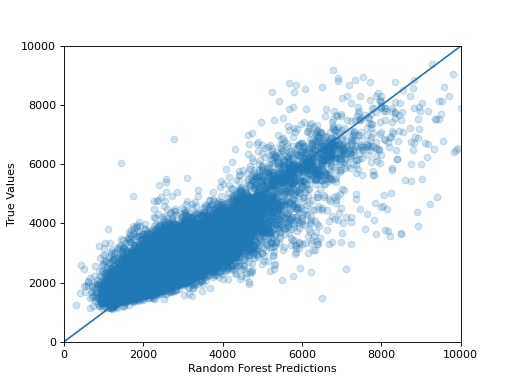

In [70]:
plt.figure()
plt.scatter(error_results[2], error_results[3], alpha=0.2)
plt.xlabel('Random Forest Predictions')
plt.ylabel('True Values')
lims = [0, 10000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()